# Grid Search and Keras

# Step 1: Preprocess Data into Scaled Variables and Splitting into Training and Testing


In [3]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [4]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [5]:
df = pd.read_csv("/content/gdrive/MyDrive/441_Lecture_6/CLV.csv")


In [6]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [7]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Running a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [12]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (20,5,)], 
    "activation" : ['relu','tanh'],
    "alpha": [0.0001, 0.001],
    "max_iter": [100, 200]
}

In [13]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(10,), (20, 5)],
                         'max_iter': [100, 200]})

In [14]:
print(grid.best_params_)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 5), 'max_iter': 200}


# Step 3: Training a model with the optimal solution from GridSearch

In [15]:
clf = MLPRegressor(**grid.best_params_)

In [16]:
p_dict = {
    "hidden_layer_sizes": (20,5), 
    "activation" : 'relu',
    "alpha": 0.0001,
    "max_iter": 200
}

MLPRegressor(**p_dict)

MLPRegressor(hidden_layer_sizes=(20, 5))

# Step 4: Calculating in-sample and out-of-sample MSEs

In [17]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
in_sample_mse = mean_squared_error(y_train, y_train_pred)

y_test_pred = clf.predict(X_test)
out_of_sample_mse = mean_squared_error(y_test, y_test_pred)

print("In-sample MSE:", in_sample_mse)
print("Out-of-sample MSE:", out_of_sample_mse)



In-sample MSE: 44840457.50322132
Out-of-sample MSE: 41582785.59898939


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Step 5: Building a Keras with the architecture defined by GridSearchCV

In [18]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [19]:
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation = "relu"))
model.add(Dense(5,activation = "relu"))
model.add(Dense(1,activation = "linear"))



In [20]:
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer = Adam(learning_rate = 0.0001))
model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
200/200 [==============================] - 1s 2ms/step - loss: 113445488.0000
Epoch 2/200
200/200 [==============================] - 0s 2ms/step - loss: 113444352.0000
Epoch 3/200
200/200 [==============================] - 0s 2ms/step - loss: 113443328.0000
Epoch 4/200
200/200 [==============================] - 0s 2ms/step - loss: 113442536.0000
Epoch 5/200
200/200 [==============================] - 0s 2ms/step - loss: 113441952.0000
Epoch 6/200
200/200 [==============================] - 0s 2ms/step - loss: 113441600.0000
Epoch 7/200
200/200 [==============================] - 1s 3ms/step - loss: 113441368.0000
Epoch 8/200
200/200 [==============================] - 1s 3ms/step - loss: 113441152.0000
Epoch 9/200
200/200 [==============================] - 0s 2ms/step - loss: 113441032.0000
Epoch 10/200
200/200 [==============================] - 1s 3ms/step - loss: 113440944.0000
Epoch 11/200
200/200 [==============================] - 1s 3ms/step - loss: 113440824.0000
Epoch 12

In [43]:
# Saving the model
keras.models.save_model(model, "/folder/model.pb")

# Loading the model
mod = keras.models.load_model("/folder/model.pb")


# Step 6: Making visualizations of NN using “plot_model” and “ann_viz”

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                340       
                                                                 
 dense_4 (Dense)             (None, 5)                 105       
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras.utils import plot_model

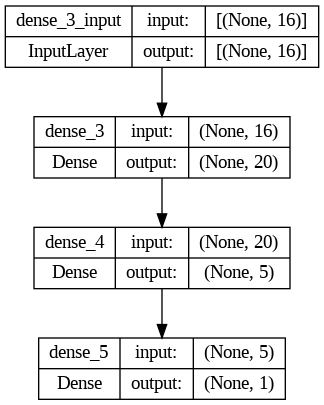

In [24]:
plot_model(model, show_shapes = True)

In [39]:
!pip install graphviz ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from ann_visualizer.visualize import ann_viz


In [48]:
ann_viz(model, title="CLV NN Viz", filename="model.png")

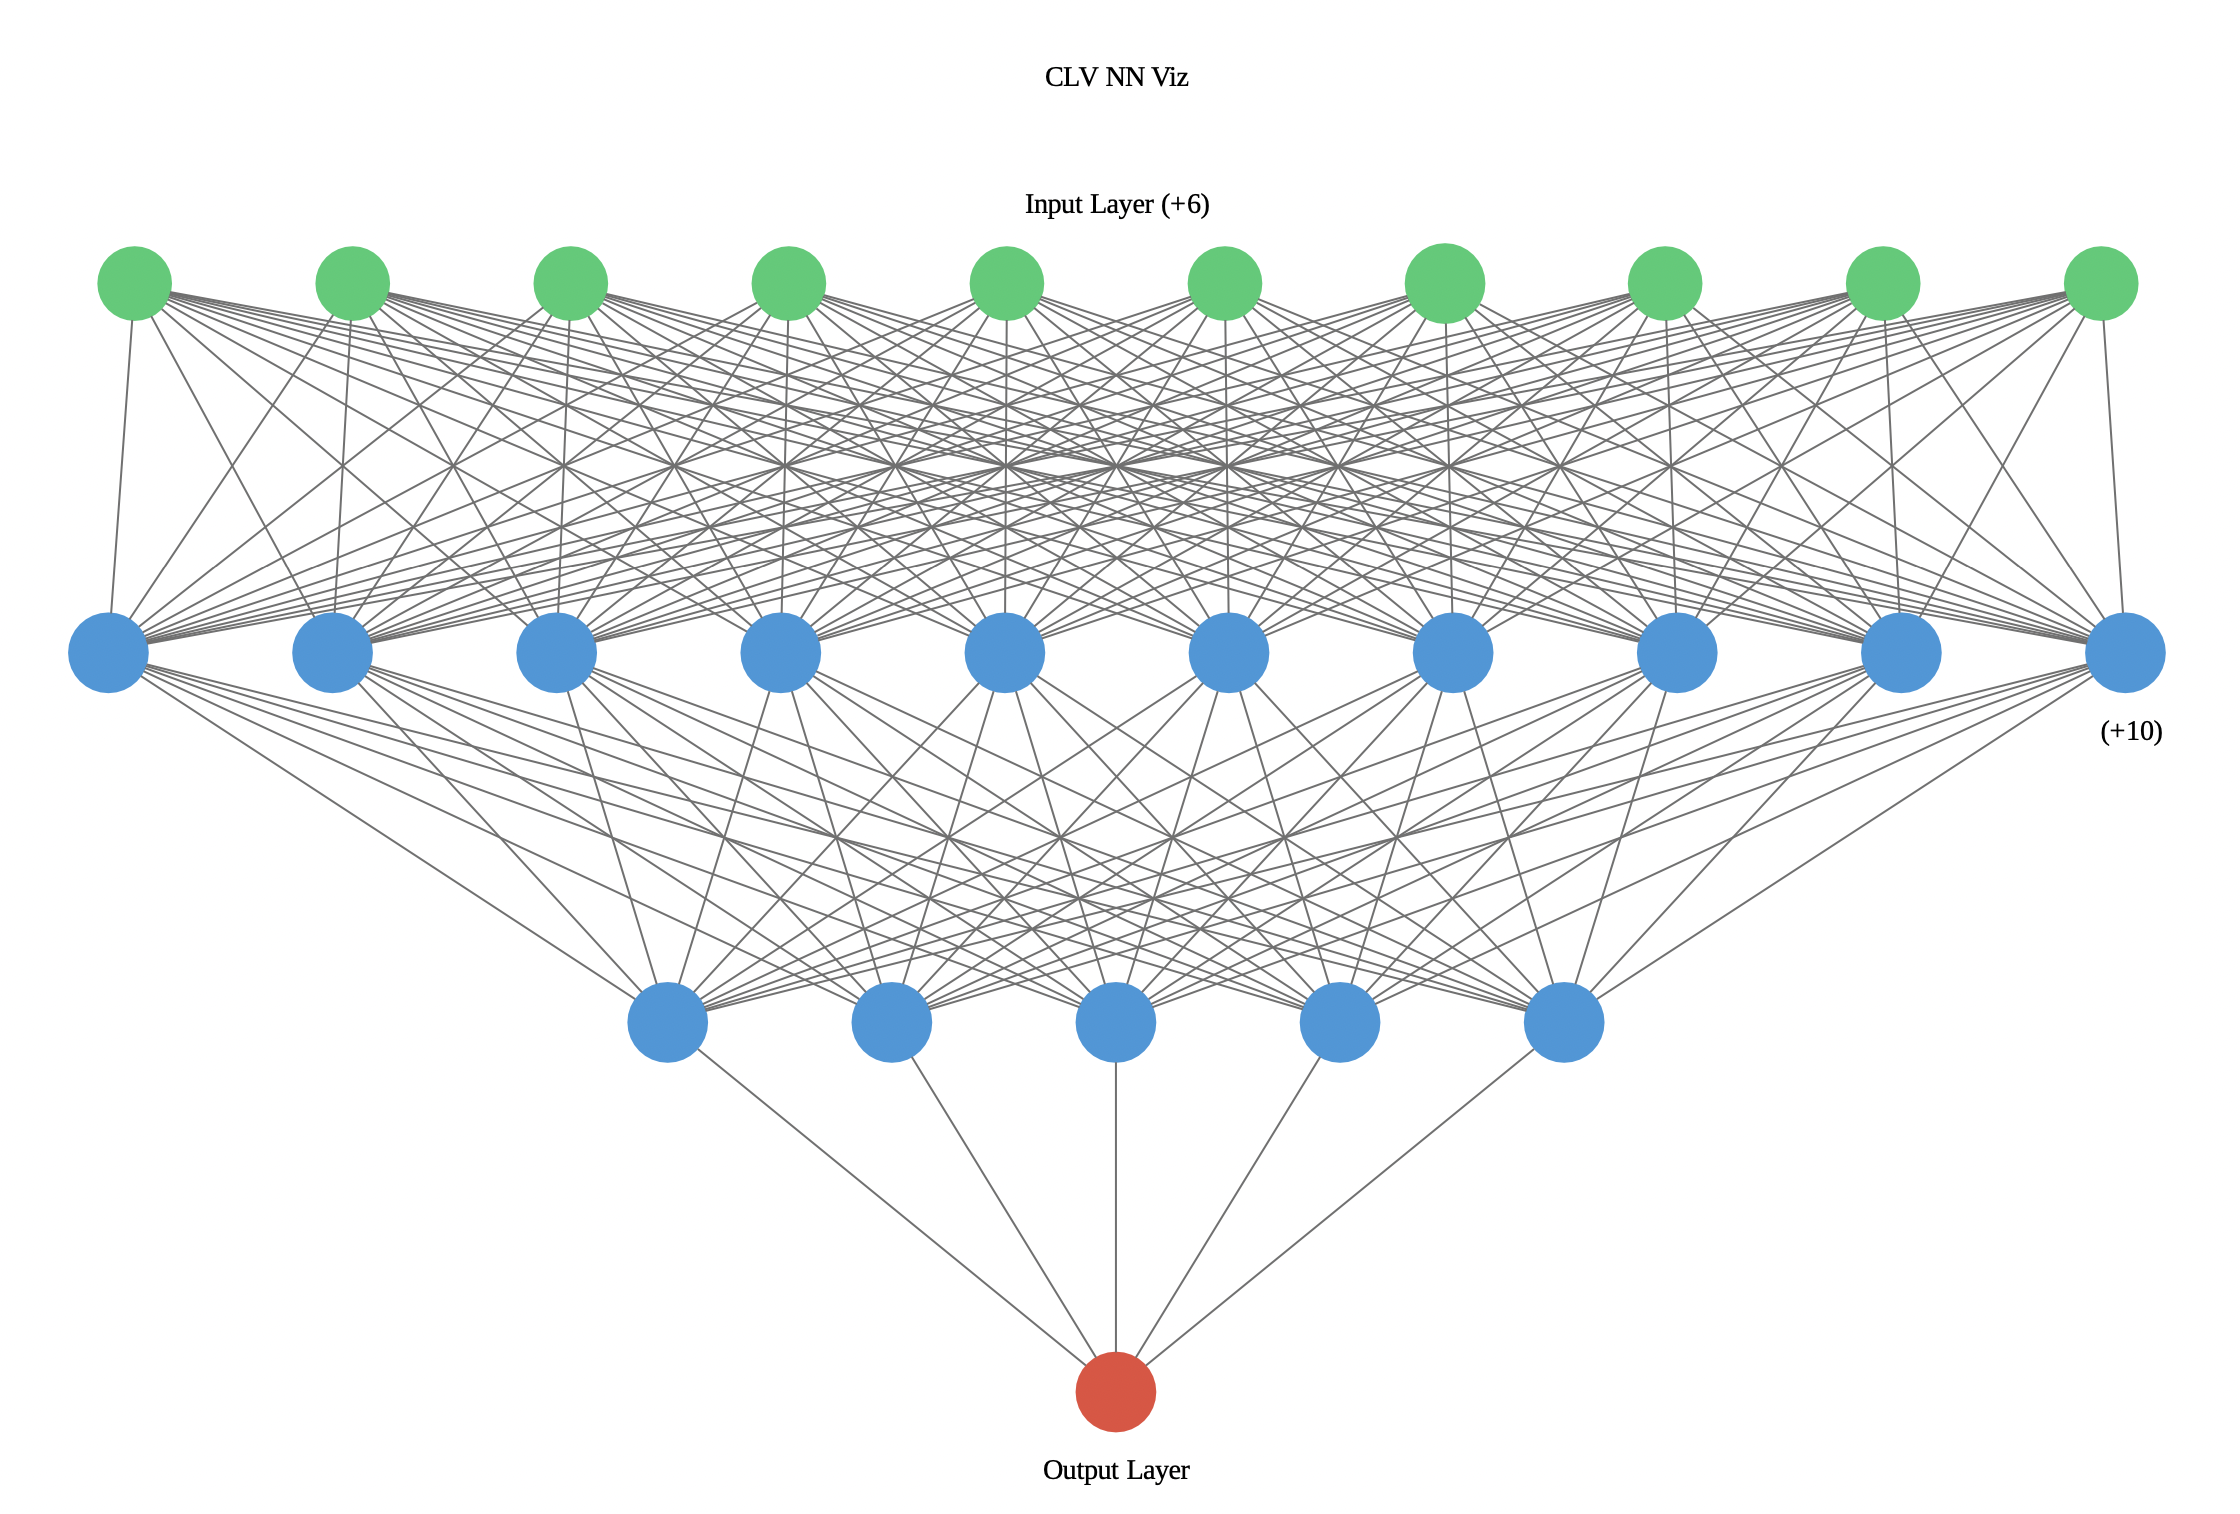

In [56]:
from IPython.display import Image
Image(filename = "/content/gdrive/MyDrive/441_Lecture_6/visualization.png")
